In [353]:
# %pip install yahooquery
# %pip install sklearn
# %pip install seaborn

1A. Loading of stock prices:

In [354]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


sc = StandardScaler()

snp_tickers = ['ABT', 'JNJ', 'DUK', 'XOM', 'ABNB', 'BKNG', 'DAL', 'WMT', 'COST', 'BAC','JPM','AAPL', 'MSFT','AMZN']
sectors = {
    'Healthcare': ['ABT', 'JNJ'],
    'Energy': ['DUK', 'XOM'],
    'Hospitality': ['ABNB', 'BKNG', 'DAL'],
    'Retail': ['WMT', 'COST'],
    'Financials': ['BAC', 'JPM'],
    'Technology': ['AAPL', 'MSFT', 'AMZN']
}


df = yf.download(snp_tickers, start='2019-01-01', end='2021-12-31')['Adj Close']
df.dropna(inplace=True)

df = pd.DataFrame(sc.fit_transform(df), columns=df.columns, index=df.index)
df.head()


[*********************100%***********************]  14 of 14 completed


Ticker,AAPL,ABNB,ABT,AMZN,BAC,BKNG,COST,DAL,DUK,JNJ,JPM,MSFT,WMT,XOM
Date,,,,,,,,,,,,,,
2020-12-10 00:00:00+00:00,-1.190367,-1.088542,-1.952019,-1.475097,-2.136676,-1.330233,-0.687576,-0.024562,-1.387660,-2.300531,-2.736032,-1.628419,0.801018,-2.133533
2020-12-11 00:00:00+00:00,-1.247108,-1.361702,-1.888003,-1.381308,-2.241530,-1.447613,-0.653188,-0.268375,-1.421793,-2.188618,-2.790205,-1.557867,0.793350,-2.163567
2020-12-14 00:00:00+00:00,-1.290177,-1.824472,-1.917450,-1.126580,-2.309492,-1.621505,-0.663906,-0.559290,-1.485413,-2.808933,-2.886345,-1.533663,0.534301,-2.389539
2020-12-15 00:00:00+00:00,-0.873163,-2.084623,-1.832951,-1.075383,-2.227939,-1.381354,-0.701122,-0.237898,-1.333355,-2.569123,-2.732217,-1.535465,0.520865,-2.272262
2020-12-16 00:00:00+00:00,-0.877949,-1.424738,-1.847033,-0.598967,-2.212404,-1.376406,-0.737445,-0.451236,-1.566092,-2.713014,-2.705511,-1.402858,0.492080,-2.177869


The following is a brief breakdown of the sectors chosen, thier tickers and company names:

Healthcare: ABT (Abbott Laboratories) | Technology: MSFT (Microsoft Corporation) | Energy: XOM (Exxon Mobil Corporation) | Consumer Discretionary: AMZN (Amazon) | Travel & Hospitality: DAL (Delta Air Lines) | Real Estate: AVB (AvalonBay Communities) | Consumer Staples: KO (Coca-Cola) | Industrials: CAT (Caterpillar Inc.) | Finance: BAC (Bank of America) | Utilities: DUK (Duke Energy) | Technology Inc: AAPL (Apple) | Healthcare: JNJ (Johnson & Johnson)

1B:

Normalization of data to account for differing scales amoung stocks, also outputted a covariance matrix to show the relationship of these tickers.

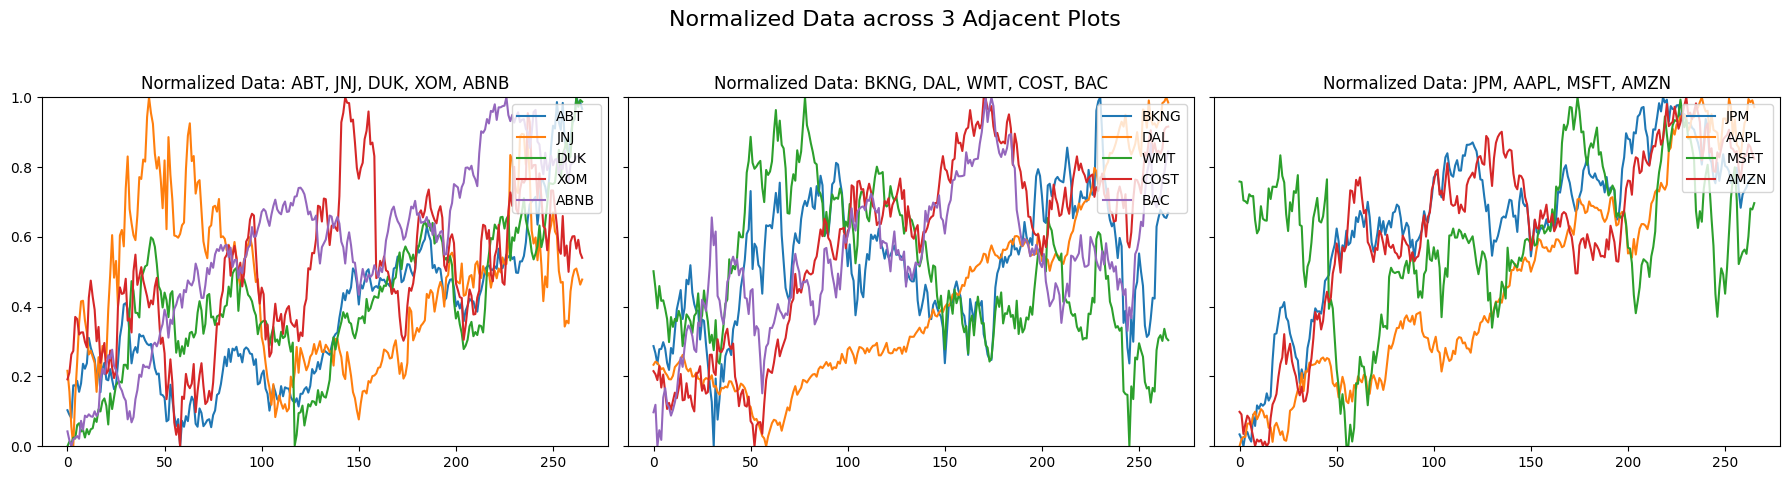

In [355]:
df_normalized = MinMaxScaler().fit_transform(df)
#df_normalized = StandardScaler().fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=snp_tickers)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

ticker_groups = np.array_split(snp_tickers, 3)
for ax, tickers in zip(axes, ticker_groups):
    ax.plot(df_normalized[tickers])
    ax.set_title(f"Normalized Data: {', '.join(tickers)}")
    ax.set_ylim([0, 1])
    ax.legend(tickers, loc='upper right')

plt.suptitle("Normalized Data across 3 Adjacent Plots", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


2a. Apply PCA to identify the main components of variance across stocks/sectors

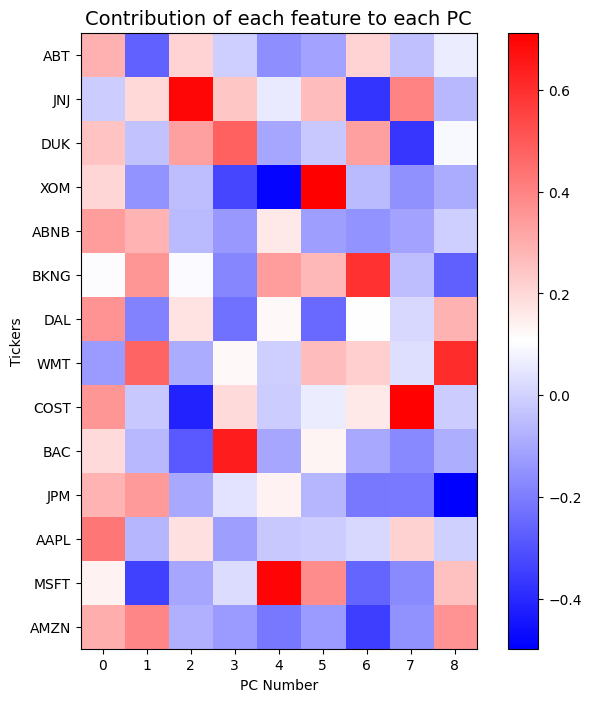

In [356]:
pca = PCA(n_components=9)
principal_components = pca.fit_transform(df_normalized)

# Eigenvectors (PC loadings)
eig_vecs = pca.components_.T

# Plot PC contributions
ticks = np.linspace(np.min(eig_vecs), np.max(eig_vecs), 5)
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(eig_vecs, cmap="bwr", interpolation="nearest")

cb = plt.colorbar(im)

plt.xlabel("PC Number")
plt.ylabel("Tickers")
plt.yticks(np.arange(len(snp_tickers)), snp_tickers)
plt.title("Contribution of each feature to each PC", fontsize=14)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

From the bar chart above it is very obvious that PC1 and PC2 are the main contributors to variance.

C:\Users\gianm\AppData\Local\Temp\ipykernel_55500\686902589.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pc_labels, rotation=10, ha='right')


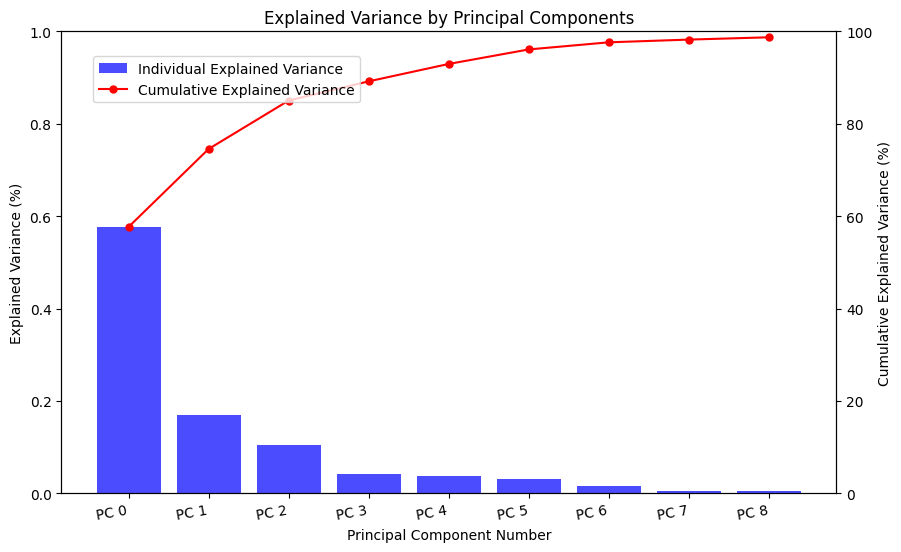

          PC 0      PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  \
ABT   0.292530 -0.266278  0.210698 -0.010171 -0.160727 -0.110412  0.207308   
JNJ  -0.014460  0.197023  0.693758  0.243030  0.055241  0.266724 -0.372671   
DUK   0.247114 -0.039325  0.333157  0.478860 -0.103299 -0.024181  0.331140   
XOM   0.204396 -0.146547 -0.046638 -0.328627 -0.486575  0.712393 -0.055790   
ABNB  0.340042  0.285173 -0.057333 -0.134256  0.162370 -0.123310 -0.148083   
BKNG  0.098064  0.355438  0.094318 -0.177753  0.342429  0.272804  0.592582   
DAL   0.364848 -0.190159  0.175369 -0.224936  0.122954 -0.245001  0.110284   
WMT  -0.131005  0.473488 -0.088755  0.125402 -0.008545  0.267718  0.221072   
COST  0.353271 -0.020768 -0.413826  0.194975 -0.011560  0.060608  0.162841   
BAC   0.194727 -0.059322 -0.283211  0.643233 -0.104517  0.131923 -0.096773   
JPM   0.282704  0.343717 -0.100840  0.043888  0.138935 -0.064192 -0.214096   
AAPL  0.430960 -0.063624  0.179483 -0.123825 -0.021822 -0.012778

In [357]:

explained_variance = pca.explained_variance_ratio_

pc_labels = ['PC %s' % i for i in range(0, 9)]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(pc_labels, explained_variance, alpha=0.7, color='b', label='Individual Explained Variance')
ax1.set_ylabel('Explained Variance (%)')
ax1.set_xlabel('Principal Component Number')
ax1.set_xticklabels(pc_labels, rotation=10, ha='right')
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
ax2.plot(pc_labels, explained_variance.cumsum()*100, 'ro-', label='Cumulative Explained Variance', markersize=5)
ax2.set_ylabel('Cumulative Explained Variance (%)')
ax2.set_ylim(0, 100)

plt.title('Explained Variance by Principal Components')
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.85))
plt.show()
ls = pd.DataFrame(pca.components_.T, columns = pc_labels, index = snp_tickers)
print(ls)

In [358]:
loadingscore = pd.DataFrame(pca.components_[:3].T, columns = pc_labels[:3], index = snp_tickers)

weighted_loading_scores_ticker = []
weighted_loading_scores_sector = []
for sector in sectors:
    sum = 0
    counter = 0
    for label in sectors[sector]:
        pc = loadingscore.loc[label]
        for i in range(3):
            sum += pc[i] * explained_variance[i]
        weighted_loading_scores_ticker.append(sum)
        counter += 1
    weighted_loading_scores_sector.append(sum/counter)

print(weighted_loading_scores_ticker)
print(weighted_loading_scores_sector)

sector_performance = pd.Series(weighted_loading_scores_sector, index = sectors.keys())
ticker_performance = pd.Series(weighted_loading_scores_ticker, index = snp_tickers)
print(sector_performance.sort_values(ascending=True))
print(ticker_performance.sort_values(ascending=True))



[np.float64(0.14589489587445903), np.float64(0.24359775571781878), np.float64(0.1708581403532732), np.float64(0.2591292379435506), np.float64(0.23827611280752567), np.float64(0.3647423848534581), np.float64(0.5614966397195224), np.float64(-0.00494711893062558), np.float64(0.1519114423470798), np.float64(0.07259898756612912), np.float64(0.28311955665542315), np.float64(0.2566831787365668), np.float64(0.26696427077912255), np.float64(0.4966162630905437)]
[np.float64(0.12179887785890939), np.float64(0.1295646189717753), np.float64(0.1871655465731741), np.float64(0.0759557211735399), np.float64(0.14155977832771158), np.float64(0.16553875436351456)]
Retail         0.075956
Healthcare     0.121799
Energy         0.129565
Financials     0.141560
Technology     0.165539
Hospitality    0.187166
dtype: float64
WMT    -0.004947
BAC     0.072599
ABT     0.145895
COST    0.151911
DUK     0.170858
ABNB    0.238276
JNJ     0.243598
AAPL    0.256683
XOM     0.259129
MSFT    0.266964
JPM     0.283120
B

C:\Users\gianm\AppData\Local\Temp\ipykernel_55500\3020221870.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += pc[i] * explained_variance[i]


[*********************100%***********************]  6 of 6 completed

['WMT', 'BAC', 'ABT', 'COST', 'DUK']


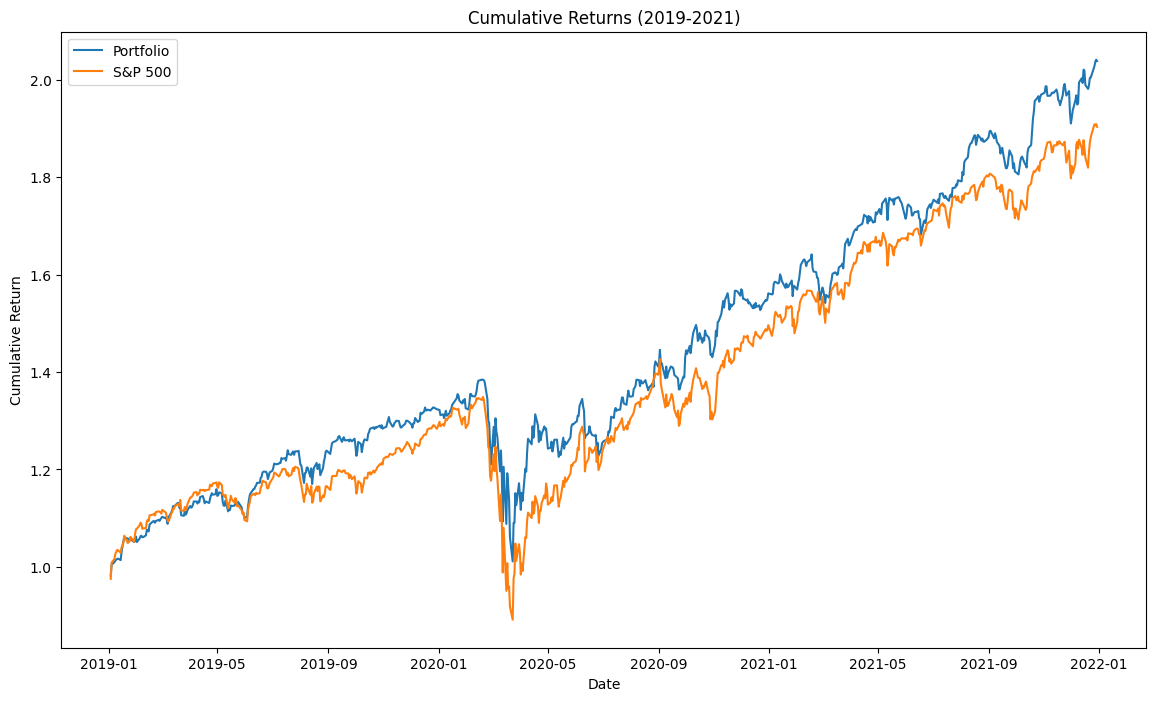

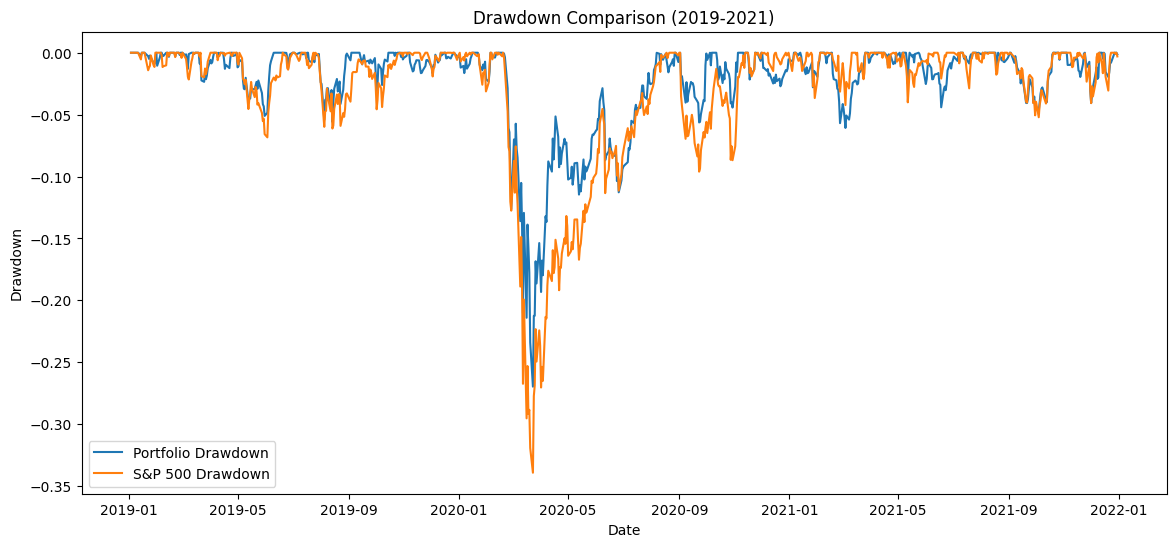

Portfolio Annualized Return: 0.25939122971450446
S&P 500 Annualized Return: 0.24042576069069083

Portfolio Annualized Volatility (Risk): 0.20777152199540064
S&P 500 Annualized Volatility (Risk): 0.22474404482042856

Maximum Portfolio Drawdown: -0.26971081510676875
Maximum S&P 500 Drawdown: -0.33924960002653304


In [359]:
portfolio_tickers = ticker_performance.sort_values(ascending=True)
portfolio_tickers = portfolio_tickers.index[:5].to_list()

print(portfolio_tickers)
snp_total_ticker = '^GSPC'

data = yf.download(portfolio_tickers + [snp_total_ticker], start='2019-01-01', end='2021-12-31')['Adj Close']

returns = data.pct_change().dropna()
weights = np.array([1/len(portfolio_tickers)] * len(portfolio_tickers))


portfolio_returns = (returns[portfolio_tickers] * weights).sum(axis=1)
benchmark_returns = returns[snp_total_ticker]


cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod()


portfolio_volatility = portfolio_returns.std() * np.sqrt(252)
benchmark_volatility = benchmark_returns.std() * np.sqrt(252)


portfolio_drawdown = cumulative_portfolio_returns / cumulative_portfolio_returns.cummax() - 1
benchmark_drawdown = cumulative_benchmark_returns / cumulative_benchmark_returns.cummax() - 1


plt.figure(figsize=(14, 8))
plt.plot(cumulative_portfolio_returns, label='Portfolio')
plt.plot(cumulative_benchmark_returns, label='S&P 500')
plt.title('Cumulative Returns (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(portfolio_drawdown, label='Portfolio Drawdown')
plt.plot(benchmark_drawdown, label='S&P 500 Drawdown')
plt.title('Drawdown Comparison (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


print("Portfolio Annualized Return:", portfolio_returns.mean() * 252)
print("S&P 500 Annualized Return:", benchmark_returns.mean() * 252)
print("\nPortfolio Annualized Volatility (Risk):", portfolio_volatility)
print("S&P 500 Annualized Volatility (Risk):", benchmark_volatility)
print("\nMaximum Portfolio Drawdown:", portfolio_drawdown.min())
print("Maximum S&P 500 Drawdown:", benchmark_drawdown.min())

